# **Trabalho de RN**

---




**Aluno:** Filipe Faria Rodrigues

**Matrícula:** 211101222

---



**1. Transfer Learning em imagens**

O *transfer learnig* consiste na utilização do aprendizado de um modelo treinado para a resolução de determinado problema, de forma que possa ser aplicado na resolução de um novo problema.

Com isso, tem-se as vantagens de otimização no tempo de treinamento para esse modelo, bem como a utilização de um menor *dataset* para o treinamento deste.

Em se tratando de imagens, tal vantagem se mostra significante, já que o conjunte de dados de teste com imagens se torna extremamente grande, tanto em relação à quantidade dados, bem como o custo para a obtenção destas.

**2. Executando do código inicial**

### Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

### Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


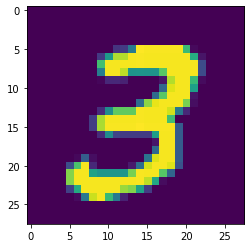

In [3]:
#access first image
first_image = x_train[7]

first_image = np.array(first_image)
pixels = first_image.reshape((28, 28))
plt.imshow(pixels)

### Build the model

In [4]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

### Train the model

In [5]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 43s 99ms/step - loss: 0.3728 - accuracy: 0.8856 - val_loss: 0.0853 - val_accuracy: 0.9780
Epoch 2/15
422/422 [==============================] - 42s 101ms/step - loss: 0.1190 - accuracy: 0.9648 - val_loss: 0.0606 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 40s 96ms/step - loss: 0.0899 - accuracy: 0.9722 - val_loss: 0.0485 - val_accuracy: 0.9863
Epoch 4/15
422/422 [==============================] - 41s 96ms/step - loss: 0.0754 - accuracy: 0.9769 - val_loss: 0.0432 - val_accuracy: 0.9865
Epoch 5/15
422/422 [==============================] - 41s 98ms/step - loss: 0.0658 - accuracy: 0.9802 - val_loss: 0.0407 - val_accuracy: 0.9885
Epoch 6/15
422/422 [==============================] - 41s 97ms/step - loss: 0.0583 - accuracy: 0.9815 - val_loss: 0.0359 - val_accuracy: 0.9880
Epoch 7/15
422/422 [==============================] - 42s 99ms/step - loss: 0.0530 - accuracy: 0.9835 - val_loss: 0.0349 - val_accuracy

### Evaluate the trained model

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02501138113439083
Test accuracy: 0.9914000034332275


**3. Alterando o otimizador para sgd**

In [7]:
model_a = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_a.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)             

In [8]:
batch_size = 128
epochs = 15

model_a.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

model_a.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 43s 101ms/step - loss: 1.5718 - accuracy: 0.4947 - val_loss: 0.5036 - val_accuracy: 0.8783
Epoch 2/15
422/422 [==============================] - 43s 101ms/step - loss: 0.5788 - accuracy: 0.8178 - val_loss: 0.2737 - val_accuracy: 0.9318
Epoch 3/15
422/422 [==============================] - 43s 103ms/step - loss: 0.3945 - accuracy: 0.8813 - val_loss: 0.2054 - val_accuracy: 0.9448
Epoch 4/15
422/422 [==============================] - 41s 97ms/step - loss: 0.3112 - accuracy: 0.9062 - val_loss: 0.1689 - val_accuracy: 0.9552
Epoch 5/15
422/422 [==============================] - 43s 101ms/step - loss: 0.2620 - accuracy: 0.9212 - val_loss: 0.1489 - val_accuracy: 0.9602
Epoch 6/15
422/422 [==============================] - 41s 98ms/step - loss: 0.2311 - accuracy: 0.9309 - val_loss: 0.1311 - val_accuracy: 0.9635
Epoch 7/15
422/422 [==============================] - 43s 102ms/step - loss: 0.2104 - accuracy: 0.9366 - val_loss: 0.1200 - val_accu

In [9]:
score_a = model_a.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_a[0])
print("Test accuracy:", score_a[1])

Test loss: 0.08741168677806854
Test accuracy: 0.9735999703407288


**4. Alterando o batch size para 256**

In [10]:
model_b = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_b.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_2 (Dropout)         (None, 1600)             

In [11]:
batch_size = 256
epochs = 15

model_b.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_b.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
211/211 [==============================] - 40s 188ms/step - loss: 0.5067 - accuracy: 0.8496 - val_loss: 0.1028 - val_accuracy: 0.9717
Epoch 2/15
211/211 [==============================] - 41s 193ms/step - loss: 0.1344 - accuracy: 0.9596 - val_loss: 0.0657 - val_accuracy: 0.9827
Epoch 3/15
211/211 [==============================] - 39s 187ms/step - loss: 0.0964 - accuracy: 0.9706 - val_loss: 0.0582 - val_accuracy: 0.9850
Epoch 4/15
211/211 [==============================] - 40s 191ms/step - loss: 0.0807 - accuracy: 0.9748 - val_loss: 0.0504 - val_accuracy: 0.9862
Epoch 5/15
211/211 [==============================] - 39s 185ms/step - loss: 0.0686 - accuracy: 0.9781 - val_loss: 0.0430 - val_accuracy: 0.9882
Epoch 6/15
211/211 [==============================] - 40s 190ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0404 - val_accuracy: 0.9887
Epoch 7/15
211/211 [==============================] - 39s 186ms/step - loss: 0.0564 - accuracy: 0.9821 - val_loss: 0.0371 - val_ac

In [12]:
score_b = model_b.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_b[0])
print("Test accuracy:", score_b[1])

Test loss: 0.026022937148809433
Test accuracy: 0.9902999997138977


**5. Alterando o drop out para 0.2**

In [13]:
model_c = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_c.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1600)             

In [14]:
batch_size = 128
epochs = 15

model_c.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_c.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 44s 102ms/step - loss: 0.3066 - accuracy: 0.9115 - val_loss: 0.0758 - val_accuracy: 0.9788
Epoch 2/15
422/422 [==============================] - 44s 103ms/step - loss: 0.0853 - accuracy: 0.9739 - val_loss: 0.0602 - val_accuracy: 0.9838
Epoch 3/15
422/422 [==============================] - 43s 101ms/step - loss: 0.0642 - accuracy: 0.9807 - val_loss: 0.0454 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0410 - val_accuracy: 0.9902
Epoch 5/15
422/422 [==============================] - 43s 103ms/step - loss: 0.0452 - accuracy: 0.9856 - val_loss: 0.0377 - val_accuracy: 0.9880
Epoch 6/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0355 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 44s 103ms/step - loss: 0.0351 - accuracy: 0.9888 - val_loss: 0.0361 - val_ac

In [15]:
score_c = model_c.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_c[0])
print("Test accuracy:", score_c[1])

Test loss: 0.029407529160380363
Test accuracy: 0.991599977016449


**6. Conclusões**

Segue abaixo um quadro com o resumo dos resultados obtidos para os modelos propostos.

```
                                    Loss          Accuracy
Modelo Inicial (adam)               0.025011      0.99140
Modelo a (sgd)                      0.087412      0.97359
Modelo b (adam - batch size 256)    0.026022      0.99029
Modelo c (adam - drop out 0.2)      0.029407      0.99159
```
Seguem algumas considerações:
- o modelo com otimizador adam apresentou resultados mais satisfatórios quando comparados com o modelo com o otimizador sgd (maior acurácia e menor perda);
- quando comparados os modelos com otimiador adam, a alteração do batch size de 128 para 256 não apresentou melhoras no resultado obtido, apesar de reduzir um pouco a perda, aumentando também o tempo para treinamento do modelo;
- o mesmo modelo com o otimizador adam, batch size 128, apresentou pequena melhora quando alterado o drop out de 0.5 para 0.2.


**8. Modelo Proposto**

Considerando os resultados obtidos nos modelos acima, vamos utilizado o otimizador adam, com batch size 128, drop out 0.2, porém com 10 épocas.

In [19]:
model_final = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model_final.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_4 (Dropout)         (None, 1600)             

In [20]:
batch_size = 128
epochs = 10

model_final.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model_final.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 44s 102ms/step - loss: 0.3164 - accuracy: 0.9091 - val_loss: 0.0814 - val_accuracy: 0.9780
Epoch 2/10
422/422 [==============================] - 42s 100ms/step - loss: 0.0919 - accuracy: 0.9719 - val_loss: 0.0554 - val_accuracy: 0.9837
Epoch 3/10
422/422 [==============================] - 42s 101ms/step - loss: 0.0671 - accuracy: 0.9798 - val_loss: 0.0500 - val_accuracy: 0.9837
Epoch 4/10
422/422 [==============================] - 40s 96ms/step - loss: 0.0566 - accuracy: 0.9823 - val_loss: 0.0398 - val_accuracy: 0.9883
Epoch 5/10
422/422 [==============================] - 42s 100ms/step - loss: 0.0469 - accuracy: 0.9849 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 6/10
422/422 [==============================] - 42s 99ms/step - loss: 0.0432 - accuracy: 0.9862 - val_loss: 0.0378 - val_accuracy: 0.9895
Epoch 7/10
422/422 [==============================] - 41s 97ms/step - loss: 0.0377 - accuracy: 0.9879 - val_loss: 0.0345 - val_accur

In [21]:
score_final = model_final.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score_final[0])
print("Test accuracy:", score_final[1])

Test loss: 0.02622392028570175
Test accuracy: 0.9912999868392944
